In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Centered Moving Average

$center_{ma}(t) = mean(obs(t-1), obs(t), obs(t+1))$ 

## Trailing Moving Average

$trail_{ma}(t) = mean(obs(t-2), obs(t-1), obs(t))$ 

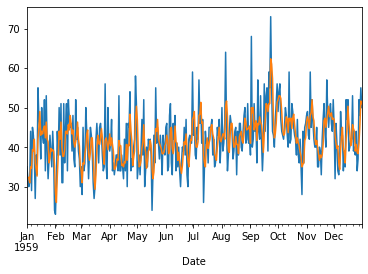

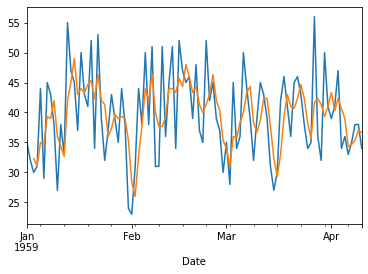

In [13]:
pd.set_option('display.max_rows', 400)

df = pd.read_csv('./dataset/daily-total-female-births.csv', index_col='Date', parse_dates=['Date'])
df['Births (rol=3)'] = df.rolling(window=3).mean()


df['Births'].plot()
df['Births (rol=3)'].plot()
plt.show()

df['Births'][:100].plot()
df['Births (rol=3)'][:100].plot()
plt.show()

In [31]:
pd.reset_option('display.max_rows')

new_df = df[['Births']].copy(deep=True)

width = 3
new_df['t'] = new_df['Births'].shift(1)
new_df['mean'] = new_df['Births'].shift(width-1).rolling(width).mean()

new_df.head()

,Births,t,mean
Date,,,
1959-01-01,35,NaN,NaN
1959-01-02,32,35.0,NaN
1959-01-03,30,32.0,NaN
1959-01-04,31,30.0,NaN
1959-01-05,44,31.0,32.333333


## Moving Average as Prediction

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


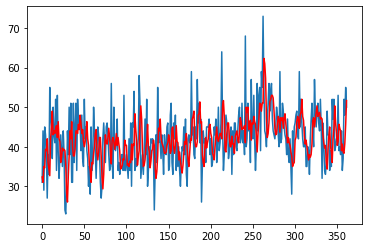

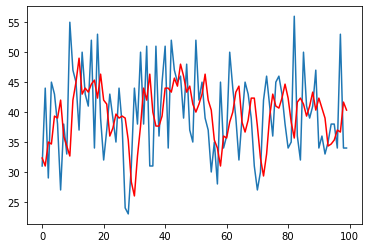

In [50]:
from sklearn.metrics import mean_squared_error

new_df = df[['Births']].copy(deep=True)

window = 3
X = new_df.values

history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]

predictions = []

for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

mse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % mse)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()